In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
from keras.models import Sequential, load_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
#载入中国和美国的数据
#usecols：选取数据的列
CN_data= pd.read_csv('./处理后的数据集/alltime_China_to4.1.csv',usecols=[0,1,9]) 
data_part_allworld= pd.read_csv('./处理后的数据集/部分热门国家数据.csv',usecols=[0,1,2,12]) 
USA_data=data_part_allworld[data_part_allworld['名称']=='美国']
USA_data.reset_index(drop=True, inplace=True)

In [4]:
CN_data=CN_data[['日期','累计确诊']]
USA_data=USA_data[['日期','累计确诊']]

In [5]:
CN_data.head()

,日期,累计确诊
0,2020/1/20,291
1,2020/1/21,440
2,2020/1/22,571
3,2020/1/23,830
4,2020/1/24,1287


In [6]:
USA_data.head()

,日期,累计确诊
0,2020-02-08,14
1,2020-02-13,15
2,2020-02-21,34
3,2020-02-22,53
4,2020-02-24,53


In [28]:
dataset1=CN_data.iloc[:,1:]
dataset2=USA_data.iloc[:,1:]
#归一化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1)
dataset2 = scaler.fit_transform(dataset2)

In [8]:
def create_dataset(dataset1, timestep ):
    dataX, dataY = [], []
    for i in range(len(dataset1)-timestep -1):
        a = dataset1[i:(i+timestep )]
        dataX.append(a)
        dataY.append(dataset1[i + timestep ])
    return np.array(dataX),np.array(dataY)
#训练数据太少 timestep 取3
timestep  = 3
trainX,trainY  = create_dataset(dataset1,timestep )

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.save("LSTM.h5")

Epoch 1/100
 - 2s - loss: 0.0994
Epoch 2/100
 - 0s - loss: 0.0122
Epoch 3/100
 - 0s - loss: 0.0052
Epoch 4/100
 - 0s - loss: 0.0036
Epoch 5/100
 - 0s - loss: 0.0025
Epoch 6/100
 - 0s - loss: 0.0017
Epoch 7/100
 - 0s - loss: 0.0013
Epoch 8/100
 - 0s - loss: 0.0011
Epoch 9/100
 - 0s - loss: 9.3695e-04
Epoch 10/100
 - 0s - loss: 8.5947e-04
Epoch 11/100
 - 0s - loss: 8.2514e-04
Epoch 12/100
 - 0s - loss: 8.1945e-04
Epoch 13/100
 - 0s - loss: 7.7931e-04
Epoch 14/100
 - 0s - loss: 7.8253e-04
Epoch 15/100
 - 0s - loss: 7.3815e-04
Epoch 16/100
 - 0s - loss: 7.8252e-04
Epoch 17/100
 - 0s - loss: 7.3043e-04
Epoch 18/100
 - 0s - loss: 7.2286e-04
Epoch 19/100
 - 0s - loss: 7.1670e-04
Epoch 20/100
 - 0s - loss: 6.9933e-04
Epoch 21/100
 - 0s - loss: 6.5805e-04
Epoch 22/100
 - 0s - loss: 6.4865e-04
Epoch 23/100
 - 0s - loss: 6.3456e-04
Epoch 24/100
 - 0s - loss: 6.4221e-04
Epoch 25/100
 - 0s - loss: 5.9660e-04
Epoch 26/100
 - 0s - loss: 5.8871e-04
Epoch 27/100
 - 0s - loss: 5.8591e-04
Epoch 28/100
 -

In [10]:
trainPredict = model.predict(trainX)
#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)

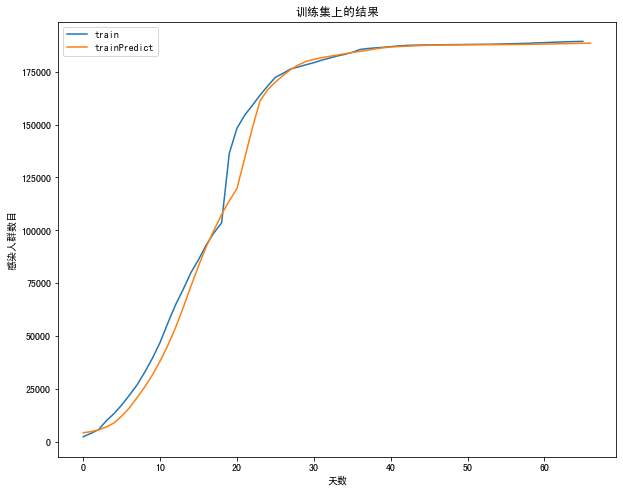

In [13]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(10, 8))
plt.plot(trainY[1:])
plt.plot(trainPredict)
plt.title('训练集上的结果')
plt.xlabel('天数')
plt.ylabel('感染人群数目')
plt.legend(['train', 'trainPredict'], loc='best')
plt.show()

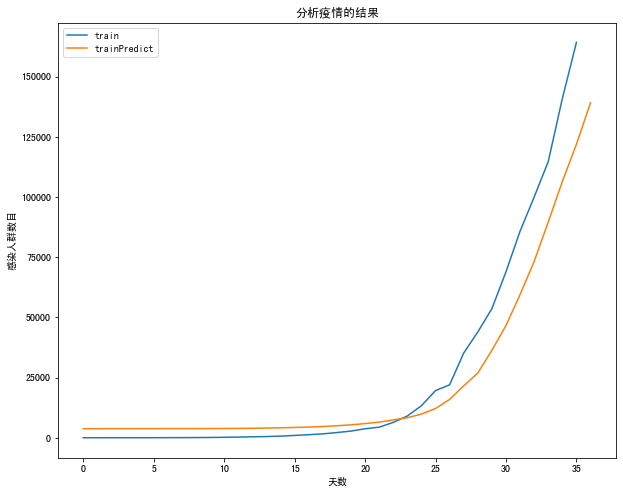

In [16]:
# 以美国新型冠状病毒数据进行测试
testdata,TEXTY  = create_dataset(dataset2,3)
res= model.predict(testdata)
# 结果反归一化
res = scaler.inverse_transform(res)
TEXTY = scaler.inverse_transform(TEXTY)
# 画图
plt.figure(figsize=(10, 8))
plt.plot(TEXTY[1:])
plt.plot(res)
plt.xlabel('天数')
plt.ylabel('感染人群数目')
plt.title('分析美国疫情的结果')
plt.legend(['train', 'trainPredict'], loc='best')
plt.show()